In [1]:
import pynbody
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_angmom(snap, ax):
    """Plot the projected angular momentum on the map on `ax`, after having
    normalized it to one. It means that short arrows plotted means L almost
    aligned with line-of-sight-direction."""
    L = pynbody.analysis.angmom.ang_mom_vec(snap)
    print("L:", L)
    norm = np.linalg.norm(L)
    ax.arrow(0, 0, L[0]/norm, L[1]/norm, head_width=0.2, head_length=.2, color='red');

In [3]:
snap = "/home/michele/sim/MoRIA/M1-10_Verbeke2017/M10sim41001/snapshot_0036"
s = pynbody.load(snap)

This is to avoid problems with some functions which use the boxsize as a reference distance. For our SPH code instead this is not used and particles are allowed to go further than the boxsize.

In [4]:
max_boxsize = 4000
s.properties['boxsize'] = pynbody.units.Unit("{} kpc".format(max_boxsize))

To have an idea of what I'm using, I just plot the gas column density, after having centered the snap on the gas particle family.

L: [ 416.82477 -642.82117 -729.207  ]


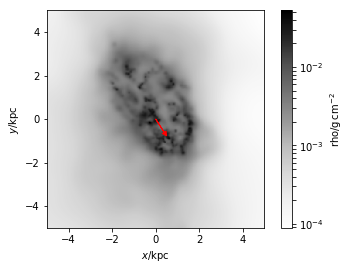

In [5]:
pynbody.analysis.halo.center(s.gas)
fig, ax = plt.subplots()
pynbody.plot.sph.image(s.gas, qty="rho", units="g cm^-2", width=10, cmap="Greys", subplot=ax);
plot_angmom(s.gas, ax)

In [6]:
pynbody.analysis.angmom.faceon(s.gas)

L: [ -86.615456 -703.3161   -785.4243  ]


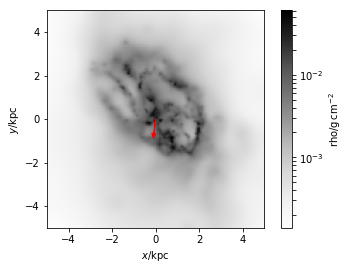

In [7]:
fig, ax = plt.subplots()
pynbody.plot.sph.image(s.gas, qty="rho", units="g cm^-2", width=10, cmap="Greys", subplot=ax);
plot_angmom(s.gas, ax)

In [8]:
subsnap = s[pynbody.filt.Cuboid('{} kpc'.format(-20))]

In [9]:
pynbody.analysis.angmom.faceon(subsnap.gas)

L: [ 1.6973679   0.35531247 12.154452  ]


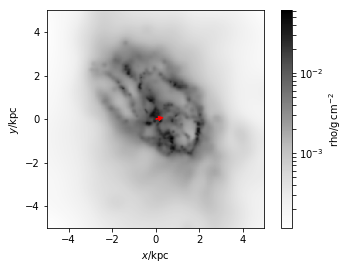

In [10]:
fig, ax = plt.subplots()
pynbody.plot.sph.image(subsnap.gas, qty="rho", units="g cm^-2", width=10, cmap="Greys", subplot=ax);
plot_angmom(subsnap.gas, ax)